In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import ABCD_gaussian as ag
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})

### Define sample properties

In [3]:
mean_bknd = np.array([0,0,0])

In [4]:
xx_bknd = 1000
xy_bknd = 700
xz_bknd = 600
yy_bknd = 1000
yz_bknd = -100
zz_bknd = 1000

cov_bknd = np.array([[xx_bknd,xy_bknd,xz_bknd],[xy_bknd,yy_bknd,yz_bknd], [xz_bknd,yz_bknd,zz_bknd]])

In [5]:
mean_sig = np.array([100,100,100])

In [6]:
xx_sig = 200
xy_sig = 100
xz_sig = 150
yy_sig = 300
yz_sig = 200
zz_sig = 500

cov_sig = np.array([[xx_sig,xy_sig,xz_sig],[xy_sig,yy_sig,yz_sig], [xz_sig,yz_sig,zz_sig]])

### Generate/plot sample

In [13]:
N_bknd = 5*10**6   #5*10**6
N_sig = 10**4
bknd, sig = ag.gen_sample3d(mean_bknd, cov_bknd, mean_sig, cov_sig, N_bknd, N_sig)

In [14]:
# ag.plot3d(bknd, sig, s=1)
# plt.savefig('xyz_3d_40to100_1e5_1e3.png', dpi=200)

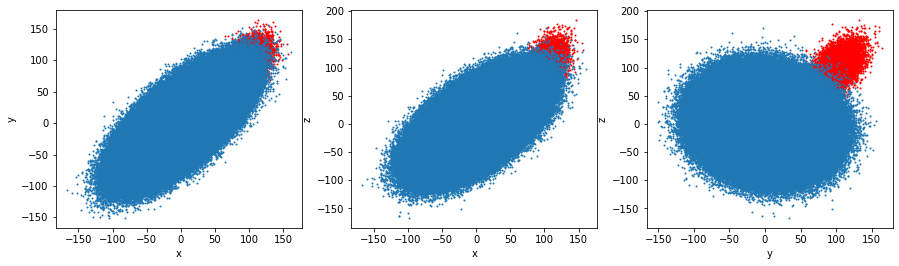

In [15]:
ag.plot(bknd, sig, s=1)
#plt.savefig('xyz_3d_40to100_1e5_1e3_flat.png', dpi=200)

### ABCD

In [16]:
fit_range = [40, 100] #single range for x, y, z

bknd_fit = (bknd[:,0]>fit_range[0])&(bknd[:,0]<fit_range[1])&(bknd[:,1]>fit_range[0])&(bknd[:,1]<fit_range[1])&(bknd[:,2]>fit_range[0])&(bknd[:,2]<fit_range[1])
sig_fit = (sig[:,0]>fit_range[0])&(sig[:,0]<fit_range[1])&(sig[:,1]>fit_range[0])&(sig[:,1]<fit_range[1])&(sig[:,2]>fit_range[0])&(sig[:,2]<fit_range[1])

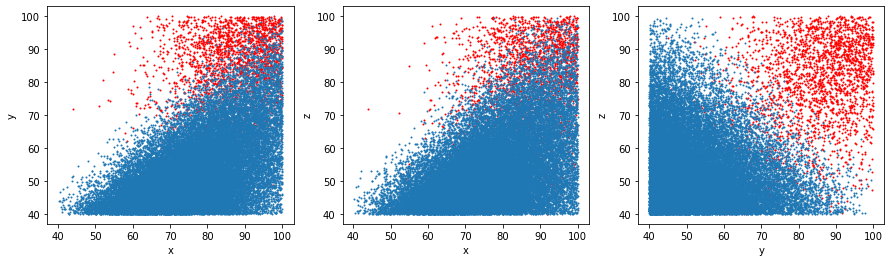

In [18]:
ag.plot(bknd[bknd_fit], sig[sig_fit], s=1)

In [19]:
ctrl_region = [40, 60]   
np.round(ag.abcd3d(bknd[bknd_fit], sig[sig_fit], ctrl_region), 3)

# returns:
# for x-y, x-z, and y-z,
# [bknd]
# [total]
# [Signal contaminaiton (sig/total in control region)]
# [ABCD with bknd]
# [ABCD with total]

array([[7338.00, 7536.00, 1005.00],
       [9664.00, 9685.00, 3108.00],
       [0.00, 0.01, 0.01],
       [130.25, 230.64, 1956.15],
       [239.57, 298.10, 2044.06]])

### Sample to crlist

* The sample is normalized to $[0,1]$ before saving.
* `binsize = 6` is hard-coded in some parts of the code. May not function properly with different values.

In [20]:
#Select bknd, sig, or total

x, y, z = bknd.T
# x, y, z = sig.T
# x, y, z = np.concatenate((bknd, sig)).T

In [21]:
xcut = [40, 100] #define region of interest
ycut = [40, 100]
zcut = [40, 100]

binsize = 6
xbin = np.linspace(*xcut, binsize+1) #define appropriate bin size
ybin = np.linspace(*ycut, binsize+1)
zbin = np.linspace(*zcut, binsize+1)

fit_region = (x>xcut[0])&(x<xcut[1])&(y>ycut[0])&(y<ycut[1])&(z>zcut[0])&(z<zcut[1])

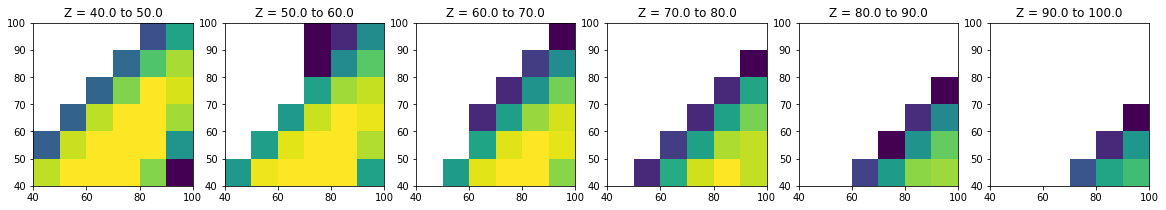

In [22]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3))

for i in range(6):
    zcut_i = zbin[i]
    fit_region = (x>xcut[0])&(x<xcut[1])&(y>ycut[0])&(y<ycut[1])&(z>zcut_i)&(z<zcut_i+10)
    ax[i].hist2d(x[fit_region], y[fit_region], norm=colors.LogNorm(vmax=5e2), bins=[xbin,ybin])[0]
    ax[i].set_title(f'Z = {zcut_i} to {zcut_i+10}')

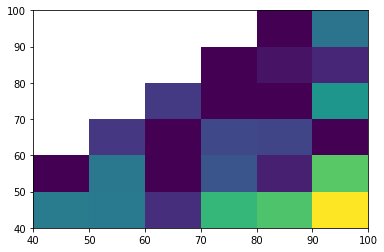

In [454]:
crlist = np.array([])
for i in range(6):
    zcut_i = zbin[i]
    x_norm = np.linspace(0,1,binsize)
    y_norm = np.linspace(0,1,binsize)
    yy, xx = np.meshgrid(y_norm, x_norm)
    zz = np.full(xx.shape, i/5)
    
    fit_region = (x>xcut[0])&(x<xcut[1])&(y>ycut[0])&(y<ycut[1])&(z>zcut_i)&(z<zcut_i+10)
    grid = plt.hist2d(x[fit_region], y[fit_region], norm=colors.LogNorm(), bins=[xbin,ybin])
    arr = np.array([zz, yy, xx, grid[0]]).T
    
    crlist = np.append(crlist, arr).reshape((-1, 4))

In [455]:
np.save('data/xyz_newcov_3d_40to100_5e6_0', crlist) #save histogram